In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla
from math import pi

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

In [2]:
def graphene_magnetic_ribbon(parameters): #for now it's just bearded
    '''
    Returns the Hamiltonian for a ribbon 
    geometry with zigzag boundary conditions
    in a uniform magnetic field 
    -parameters: dict
    Returns
    -H: numpy matrix of size 4*width-2+bottom_bearded+top_bearded
    '''
    #The parameters dictionary must have the following key,value pairs
    width = parameters['width']       #int Number of lattice sites in y direction
    kx = parameters['kx']             # float in (-pi/pi] wavenumber in x direction
    bottom_bearded = parameters['bottom_bearded'] #bool type of zigzag bc at the bottom
    top_bearded = parameters['top_bearded']       #bool type of zigzag bc at the top
    mag_field = parameters['mag_field']           #float magnetic field
    peierls_factor = -2/np.sqrt(3)*mag_field

    hamiltonian = np.zeros((4*width-2+bottom_bearded+top_bearded,4*width-2+bottom_bearded+top_bearded),dtype = complex)

    def index(orbital,y):
        return orbital + 4*y-1+bottom_bearded
    ### We have 4 orbitals
    for y in range(width):
        if y!=0 or bottom_bearded:
            hamiltonian[index(0,y),index(1,y)] = -1
            hamiltonian[index(1,y),index(0,y)] = -1
        
        hamiltonian[index(1,y),index(2,y)] = -1*np.exp(1j*peierls_factor*(y-width/2)) - np.exp(-1j*kx)*np.exp(-1j*peierls_factor*(y-width/2))
        hamiltonian[index(2,y),index(1,y)] = -1*np.exp(-1j*peierls_factor*(y-width/2)) - np.exp(1j*kx)*np.exp(1j*peierls_factor*(y-width/2))

        if y!=width-1 or top_bearded:
            hamiltonian[index(2,y),index(3,y)] = -1
            hamiltonian[index(3,y),index(2,y)] = -1

        if y<width-1:
            hamiltonian[index(3,y),index(0,y+1)] = -1*np.exp(-1j*peierls_factor*(y+0.5-width/2)) - np.exp(1j*kx)*np.exp(1j*peierls_factor*(y+0.5-width/2))
            hamiltonian[index(0,y+1),index(3,y)] = -1*np.exp(1j*peierls_factor*(y+0.5-width/2)) - np.exp(-1j*kx)*np.exp(-1j*peierls_factor*(y+0.5-width/2))

    return hamiltonian

In [7]:
parameters = {
    'width' : 60,
    'bottom_bearded' : False,
    'top_bearded' : False,
    'mag_field' : 0.01
             }
bands = []

for kx in np.linspace(-pi,pi,1000):
    parameters['kx'] = kx
    hamiltonian = graphene_magnetic_ribbon(parameters)
    bands.append(np.sort(np.linalg.eigvalsh(hamiltonian)))
bands = np.array(bands)

(-3.0, 3.0)

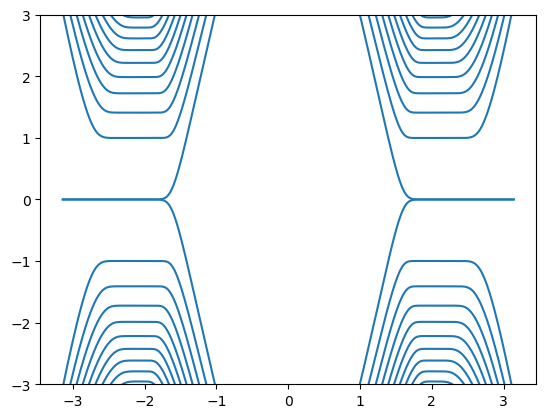

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
e1 = np.sqrt(2*parameters['mag_field'])

for i in range(bands.shape[1]):
    ax.plot(np.linspace(-pi,pi,len(bands[:,0])),bands[:,i]/e1, c = 'C0')

ax.set_ylim(-3,3)